# importing all liberary

In [5]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud , STOPWORDS
import matplotlib.pyplot as plt
import time
import seaborn as sns
from textblob import TextBlob
import nltk
import gensim
from nltk.stem import WordNetLemmatizer
import spacy
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
from wordcloud import WordCloud
import string
from sklearn.model_selection import train_test_split
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()
from sklearn.metrics import auc,classification_report ,precision_score ,recall_score ,accuracy_score, confusion_matrix , roc_curve , RocCurveDisplay , f1_score
from sklearn.ensemble import RandomForestClassifier
import typing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from collections.abc import Iterable
from tqdm import tqdm
import pickle
import gc

from IPython import display

# overview of The Datasets

In [2]:
df=pd.read_csv(r"C:\Users\Dr. Poonam\NLP\Toxic Comments Classification\train.csv")

In [3]:
df.head(1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0


In [4]:
df=df.drop("id" , axis=1)

In [5]:
df.head()

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.shape

(159571, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   comment_text   159571 non-null  object
 1   toxic          159571 non-null  int64 
 2   severe_toxic   159571 non-null  int64 
 3   obscene        159571 non-null  int64 
 4   threat         159571 non-null  int64 
 5   insult         159571 non-null  int64 
 6   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [8]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.isnull().sum()

comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [10]:
col_name=df.drop("comment_text" , axis=1).columns.values

In [11]:
for i in col_name:
    print("For  {}".format(i))
    print(df[i].value_counts())
    print("-"*15)

For  toxic
0    144277
1     15294
Name: toxic, dtype: int64
---------------
For  severe_toxic
0    157976
1      1595
Name: severe_toxic, dtype: int64
---------------
For  obscene
0    151122
1      8449
Name: obscene, dtype: int64
---------------
For  threat
0    159093
1       478
Name: threat, dtype: int64
---------------
For  insult
0    151694
1      7877
Name: insult, dtype: int64
---------------
For  identity_hate
0    158166
1      1405
Name: identity_hate, dtype: int64
---------------


In [12]:
data=df

In [13]:
## Where Value Present ( in any column except to comment_text) that row is Toxic 

In [14]:
data.sample(5)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
129971,Daeg Faerch \n\nApparently the IP I mentioned ...,0,0,0,0,0,0
55085,Yes I totally agree with you & I have asked to...,0,0,0,0,0,0
8785,sorry to hear that. wish you a fast recovery.,0,0,0,0,0,0
52023,"""\n\n working women emphasis \n\nWhy is workin...",0,0,0,0,0,0
155641,Wonderful drawing? This picture blows chunks a...,0,0,0,0,0,0


In [15]:
# now see how many comment is not toxic

In [16]:
data.head(1)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0


In [17]:
temp_df=data.drop("comment_text" , axis=1)

In [18]:
temp_df.head(1)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0


In [19]:
temp_df.sum(axis=1).value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

In [20]:
temp_df.sum(axis=1).value_counts()/temp_df.shape[0]

0    0.898321
1    0.039857
3    0.026377
2    0.021808
4    0.011030
5    0.002413
6    0.000194
dtype: float64

In [21]:
# DataSets is total Imbalanced

In [22]:
df.shape[0]-143346

16225

In [23]:
data.head(1)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0


In [24]:
temp_df2=data.sample(100)

In [25]:
col_name

array(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'], dtype=object)

In [26]:
def sampling(temp_df2):
    for i in col_name:
        df=temp_df2[temp_df2[i]==0]
    return df

In [27]:
data.head(1)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0


In [28]:
data["temp_col"]=temp_df.sum(axis=1)

In [29]:
toxic_comm=data[data["temp_col"]!=0]

In [30]:
toxic_1000=toxic_comm.head(10000).reset_index().drop(["index" , "temp_col"] , axis=1)

In [31]:
#toxic_1000.to_csv("toxic_1000.csv")

In [32]:
#toxic_1000=pd.read_csv("toxic_1000.csv")

In [33]:
#toxic_1000=toxic_1000.drop("Unnamed: 0" , axis=1)

In [34]:
toxic_1000

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
1,Hey... what is it..\n@ | talk .\nWhat is it......,1,0,0,0,0,0
2,"Bye! \n\nDon't look, come or think of comming ...",1,0,0,0,0,0
3,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
4,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
...,...,...,...,...,...,...,...
9995,Says the sad little WANKER who spends all his ...,1,0,0,0,0,0
9996,"Lady GaGa \n\nYes me again, talking about that...",0,0,1,0,1,0
9997,"""\n ...",0,0,0,0,1,0
9998,"""\n\n Everlast \n\nSarek, if you actually read...",1,0,0,0,1,0


In [35]:
# now Take 1000 of non toxic

In [36]:
non_toxic=sampling(data).sample(10000)

In [37]:
non_toxic=non_toxic.reset_index().drop(["index" , "temp_col"] , axis=1)

In [38]:
non_toxic.shape , toxic_1000.shape

((10000, 7), (10000, 7))

In [39]:
final_df=pd.concat([non_toxic , toxic_1000])

In [40]:
#final_df.to_csv("final_toxic_data.csv")

In [41]:
final_df=pd.read_csv("final_toxic_data.csv").drop("Unnamed: 0" , axis=1)

In [42]:
final_df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"""\n\n♠ΜōōŠε♠ u suck loser. go kill urself. lo...",1,0,1,1,1,0
1,"""\n\n The reason is privacy concerns \n\nLiz, ...",0,0,0,0,0,0
2,"""\nThere is no need to blindly follow a templa...",0,0,0,0,0,0
3,""", 25 February 2008 (UTC)\nI see that you've c...",0,0,0,0,0,0
4,REDIRECT Talk:Iu Mien American,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19995,Says the sad little WANKER who spends all his ...,1,0,0,0,0,0
19996,"Lady GaGa \n\nYes me again, talking about that...",0,0,1,0,1,0
19997,"""\n ...",0,0,0,0,1,0
19998,"""\n\n Everlast \n\nSarek, if you actually read...",1,0,0,0,1,0


In [43]:
final_df["toxic"]=final_df["toxic"].apply(int)

In [44]:
final_df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"""\n\n♠ΜōōŠε♠ u suck loser. go kill urself. lo...",1,0,1,1,1,0
1,"""\n\n The reason is privacy concerns \n\nLiz, ...",0,0,0,0,0,0
2,"""\nThere is no need to blindly follow a templa...",0,0,0,0,0,0
3,""", 25 February 2008 (UTC)\nI see that you've c...",0,0,0,0,0,0
4,REDIRECT Talk:Iu Mien American,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19995,Says the sad little WANKER who spends all his ...,1,0,0,0,0,0
19996,"Lady GaGa \n\nYes me again, talking about that...",0,0,1,0,1,0
19997,"""\n ...",0,0,0,0,1,0
19998,"""\n\n Everlast \n\nSarek, if you actually read...",1,0,0,0,1,0


In [45]:
for i in col_name:
    print("For  {}".format(i))
    print(final_df[i].value_counts())
    print("-"*15)

For  toxic
1    10324
0     9676
Name: toxic, dtype: int64
---------------
For  severe_toxic
0    18947
1     1053
Name: severe_toxic, dtype: int64
---------------
For  obscene
0    14310
1     5690
Name: obscene, dtype: int64
---------------
For  threat
0    19659
1      341
Name: threat, dtype: int64
---------------
For  insult
0    14695
1     5305
Name: insult, dtype: int64
---------------
For  identity_hate
0    19167
1      833
Name: identity_hate, dtype: int64
---------------


In [46]:
final_df.head(1)

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"""\n\n♠ΜōōŠε♠ u suck loser. go kill urself. lo...",1,0,1,1,1,0


In [47]:
q=final_df[final_df["toxic"]==1]["comment_text"].values

In [48]:
def word(text):
    q=final_df[final_df[text]==1]["comment_text"].values
    word=WordCloud(
        stopwords=STOPWORDS ,
        background_color="black",
        height=1200 ,
        width=1800  
        ).generate(" ".join(q))
    plt.figure(figsize=(12,18))
    plt.imshow(word)
    plt.show()

<Figure size 864x1296 with 0 Axes>

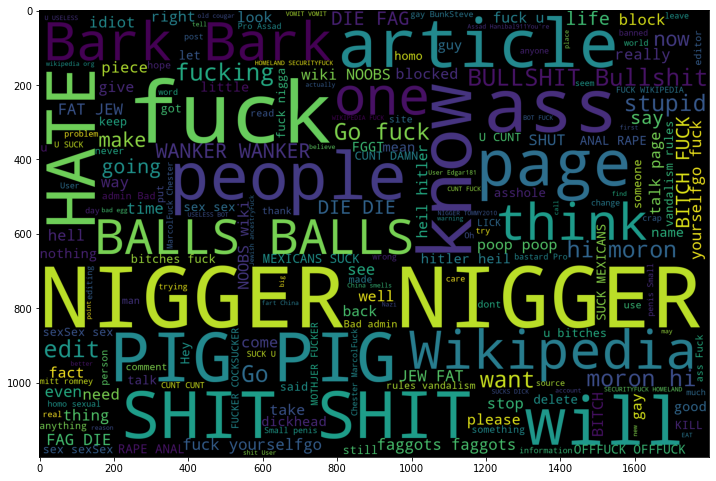

In [49]:
plt.figure(figsize=(12,18))
word("toxic")

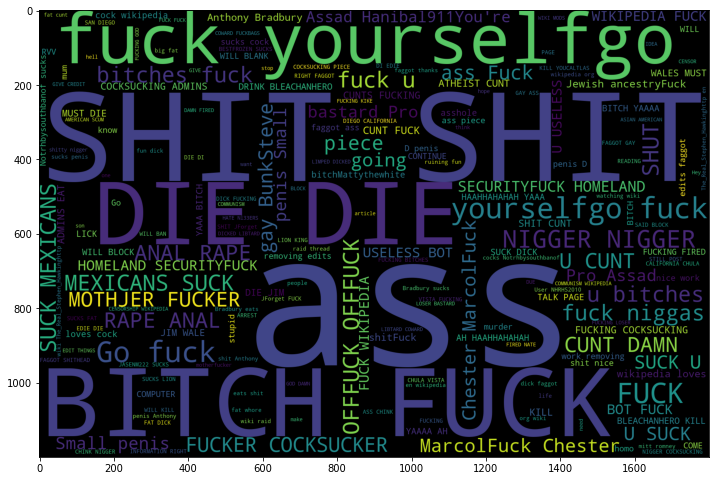

In [50]:
word("severe_toxic")

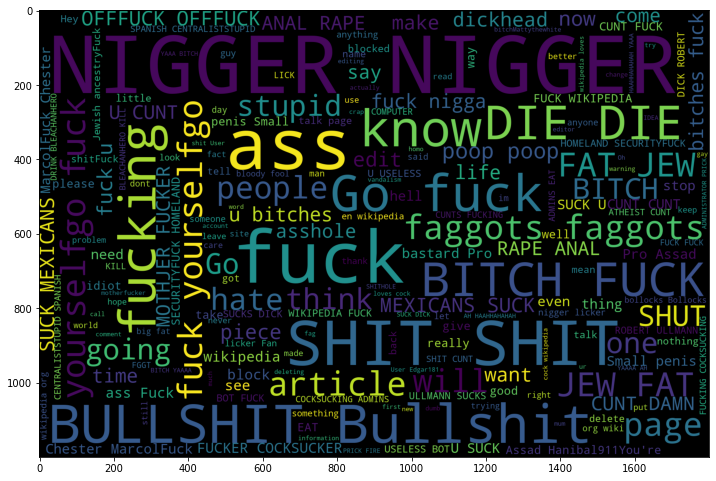

In [51]:
word("obscene")

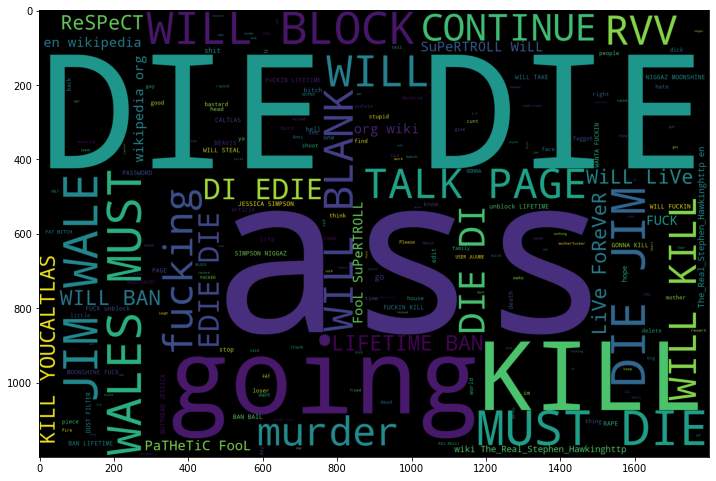

In [52]:
word("threat")

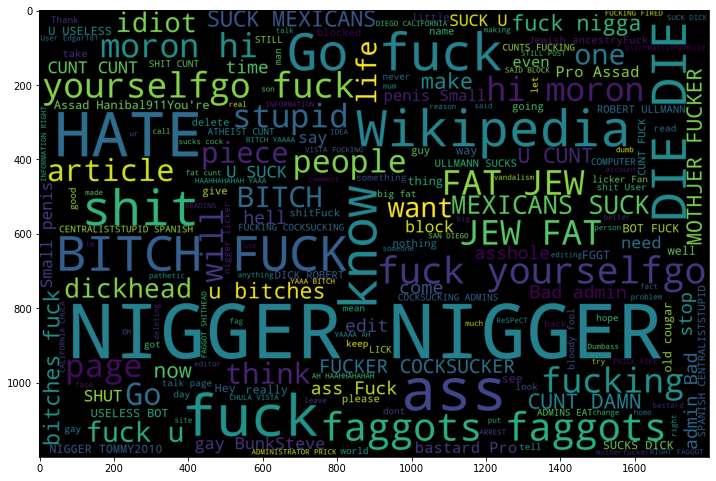

In [53]:
word("insult")

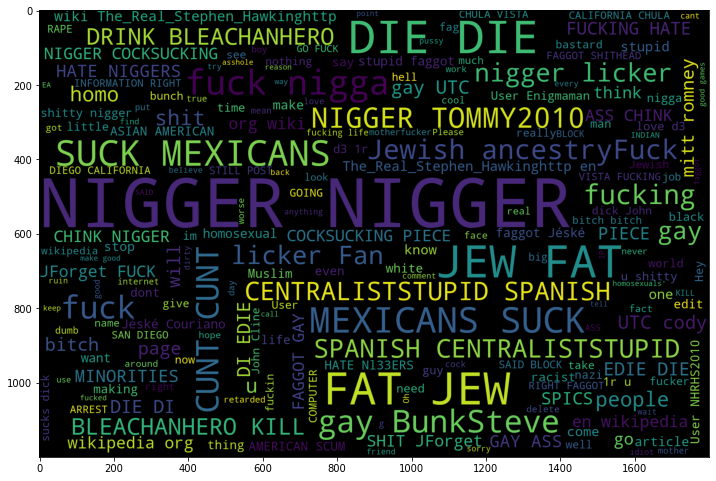

In [54]:
word("identity_hate")

In [55]:
final_df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,"""\n\n♠ΜōōŠε♠ u suck loser. go kill urself. lo...",1,0,1,1,1,0
1,"""\n\n The reason is privacy concerns \n\nLiz, ...",0,0,0,0,0,0
2,"""\nThere is no need to blindly follow a templa...",0,0,0,0,0,0
3,""", 25 February 2008 (UTC)\nI see that you've c...",0,0,0,0,0,0
4,REDIRECT Talk:Iu Mien American,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19995,Says the sad little WANKER who spends all his ...,1,0,0,0,0,0
19996,"Lady GaGa \n\nYes me again, talking about that...",0,0,1,0,1,0
19997,"""\n ...",0,0,0,0,1,0
19998,"""\n\n Everlast \n\nSarek, if you actually read...",1,0,0,0,1,0


In [56]:
# now making function preprocessing

In [211]:
def text_transformer1(text):
    #1 lower()
    text=text.lower()
    #2 tokenizer
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    #3 and 4 cheching stopwords and puctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    # 5 stemming
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [83]:
def lower(text):
    return text.lower()

In [86]:
def tokner(text):
    return nltk.word_tokenize(text)

In [58]:
def remove_hashtag(string):
    special_characters = re.compile(r'#+')
    return special_characters.sub(' ', string)

In [59]:
def remove_special_characters(string):
    special_characters = re.compile(r'[^A-Za-z0-9 \!\?#]+')
    return special_characters.sub('', string)

In [60]:
def remove_extra_whitespaces(string):
    extra_whitespaces = re.compile(r'\s+')
    return extra_whitespaces.sub(' ', string).strip()

In [61]:
def spelling(text):
    textBlb=TextBlob(text)
    return textBlb.correct().string

In [113]:
def alnum(text):
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return " ".join(y)

In [212]:
def remove_stopwords(text):
    y=[]
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    return " ".join(y)

In [214]:
lemma=WordNetLemmatizer()

In [213]:
def stemmer(text):
    y=[]
    for i in text:
        y.append(lemma.lemmatize(i))
    return " ".join(y)

In [62]:
def complete_preprocessor(text):
    text=text_transformer(text)
    text=remove_hashtag(text)
    text=remove_special_characters(text)
    text=remove_extra_whitespaces(text)
    text=spelling(text)
    return text

In [63]:
final_df.shape

(20000, 7)

In [73]:
# doing 1 by 1 preprocesss 
#def complete_preprocessor(text):
 #   4 text=text_transformer(text)
  #  2 text=remove_hashtag(text)
   # 3 text=remove_special_characters(text)
    # 1 text=remove_extra_whitespaces(text)
    #5 text=spelling(text)
    #return text

In [75]:
final_df["comment_text"]=df["comment_text"].apply(remove_extra_whitespaces)

In [76]:
final_df["comment_text"]=df["comment_text"].apply(remove_hashtag)

In [78]:
final_df["comment_text"]=df["comment_text"].apply(remove_special_characters)

In [80]:
#final_df["comment_text"]=df["comment_text"].apply(text_transformer)

In [105]:
final_df["comment_text"]=final_df["comment_text"].apply(lower)

In [108]:
final_df["comment_text"]=final_df["comment_text"].apply(tokner)

In [121]:
final_df["commet"]=final_df["comment_text"].apply(alnum)

In [165]:
final_df["comment_text"]=final_df["comment_text"].apply(remove_stopwords)

In [167]:
final_df=final_df.drop("commet" , axis=1)

In [179]:
final_df["comment_text"]=final_df["comment_text"].apply(tokner)

In [192]:
final_df["comment_text"]=final_df["comment_text"].apply(stemmer)

In [204]:
#final_df.to_csv("final_df.csv")

In [6]:
final_df=pd.read_csv("final_df.csv")

In [7]:
final_df=final_df.drop("Unnamed: 0" , axis=1)

In [8]:
final_df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,explanationwhy edits made username hardcore me...,1,0,1,1,1,0
1,daww match background colour im seemingly stuc...,0,0,0,0,0,0
2,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,morei cant make real suggestion improvement wo...,0,0,0,0,0,0
4,sir hero chance remember page thats,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19995,support asadullah two sentence describes perso...,1,0,0,0,0,0
19996,make lost faith wikipedia socalled neutrality,0,0,1,0,1,0
19997,notability dem 704 boyza tag placed dem 704 bo...,0,0,0,0,1,0
19998,didnt anything wrong first placeyou accused so...,1,0,0,0,1,0


In [9]:
final_df=final_df.dropna()

In [10]:
train , test =train_test_split(final_df  , test_size=0.3 , shuffle=True , random_state=45)

In [11]:
train_text=train["comment_text"]
test_text=test["comment_text"]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,1), norm='l2')

In [14]:
vectorizer.fit(train_text)

TfidfVectorizer(strip_accents='unicode')

In [15]:
x_train=vectorizer.transform(train_text).toarray()

In [16]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
x_test=vectorizer.transform(test_text).toarray()

In [18]:
y_train = train.drop("comment_text" , axis=1)

In [19]:
y_test = test.drop("comment_text" , axis=1)

In [20]:
x_train.shape , y_train.shape

((13998, 51567), (13998, 6))

In [21]:
x_test.shape , y_test.shape

((6000, 51567), (6000, 6))

In [22]:
from skmultilearn.problem_transform import BinaryRelevance

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
classifier=BinaryRelevance(GaussianNB())

In [25]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
classifier.fit(x_train , y_train )


KeyboardInterrupt



In [37]:
x_train.shape , y_train.shape ,  x_test.shape , y_test.shape

((13998, 51567), (13998, 6), (6000, 51567), (6000, 6))

In [36]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
y_pred = classifier.predict(y_test)

IndexError: list index out of range

In [ ]:
#final_df["comment_text"]=final_df["comment_text"].apply(complete_preprocessor)

In [ ]:
final_df.to_csv("final_toxic_df.csv")

In [ ]:
sample1

In [ ]:
from tqdm import tqdm:

In [ ]:
sample1=non_toxic.head(100)

In [ ]:
sample2=toxic_1000.head(100)

In [ ]:
sample=pd.concat([sample1 , sample2] )

In [ ]:
sample.head(1)

In [ ]:
a0=time.time()
sample["comment_text"]=sample["comment_text"].apply(complete_preprocessor)
print(time.time()-a0)

In [ ]:
sample.head(1)

In [ ]:
x=sample["comment_text"]
y=sample.drop("comment_text" , axis=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size=0.3)

In [ ]:
#sample["comment_text"]=vectorizer.fit_transform(sample["comment_text"]).toarray()

In [ ]:
x_train=vectorizer.fit_transform(x_train).toarray()

In [ ]:
x_test=vectorizer.transform(x_test).toarray()

In [ ]:
x_train.shape , x_test.shape

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

In [ ]:
vectorizer.transform(["i am going to kill him"]).toarray()

In [ ]:
classifier.predict(vectorizer.transform(["i am going to kill him"]).toarray()).toarray()

In [ ]:
x_train

Trying Different Method

In [ ]:
sample2=data.tail(100)

In [ ]:
sample2["comment_text"]=sample2["comment_text"].apply(complete_preprocessor)

In [ ]:
sample2

In [ ]:
sample2["toxic"]=sample2["toxic"].astype("int")

In [ ]:
train , test =train_test_split(sample2 , shuffle=True , random_state=32)

In [ ]:
train_test=train["comment_text"]
test_test=test["comment_text"]

In [ ]:
vectorizer1 = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')

In [ ]:
vectorizer1.fit(train_test)
vectorizer1.fit(test_test)

In [ ]:
x_train=vectorizer1.transform(train["comment_text"]).toarray()
y_train=train.drop("comment_text" , axis=1)

In [ ]:
x_test=vectorizer1.transform(test["comment_text"]).toarray()
y_test=test.drop("comment_text" , axis=1)

In [ ]:
x_test.shape , y_test.shape

In [ ]:
x_train.shape , y_train.shape

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

In [ ]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

In [ ]:
category=data_raw.drop("comment_text" , axis=1).columns.values

In [ ]:
category

In [ ]:
data=data_raw

In [ ]:
data.head(1)

In [ ]:
temp1=pd.DataFrame(data.drop("comment_text" , axis=1).sum(axis=0)).reset_index().rename({"index":"Category" , 0:"Number_of_Comment "} , axis=1)

In [ ]:
temp1.head(5)

In [ ]:
# Calculating No of Comment Having Multiple Label

In [ ]:
data.head(1)

In [ ]:
category

In [ ]:
temp2=data.drop("comment_text" , axis=1).sum(axis=1).value_counts()

In [ ]:
temp2=pd.DataFrame(temp2).reset_index()

In [ ]:
temp2.head(1)

In [ ]:
temp2["count"]=temp2[0]

In [ ]:
temp2.head(1)

In [ ]:
temp2=temp2.drop(0 , axis=1)

In [ ]:
temp2=temp2.iloc[1: , :]

In [ ]:
plt.bar(temp2["index"] , temp2["count"])
plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)
plt.show()

1.4. WordCloud representation of most used words in each category of comments

In [ ]:
data.head(1)

In [ ]:
data[data["toxic"]==1]["comment_text"].values

In [ ]:
from wordcloud import WordCloud , STOPWORDS

In [ ]:
plt.figure(figsize=(12,8))
a=data[data["toxic"]==1]["comment_text"].values
cloud=WordCloud(
                stopwords=STOPWORDS ,
                background_color="black" ,
                collocations=False ,
                width=2500 ,
                height=1800
                ).generate(" ".join(a))

plt.imshow(cloud)

In [ ]:
from wordcloud import WordCloud , STOPWORDS

In [ ]:
b=data[data["severe_toxic"]==1]["comment_text"].values

In [ ]:
plt.figure(figsize=(12,8))
cloud=WordCloud(
                stopwords=STOPWORDS ,
                background_color="black" ,
                collocations=False ,
                width=2500 ,
                height=1800          
            ).generate(" ".join(b))
plt.imshow(cloud)
plt.show()

In [ ]:
from wordcloud import WordCloud , STOPWORDS

In [ ]:
plt.figure(figsize=(12,18))
def wordcloud(text):
    t=df[df[text]==1]["comment_text"].values
    cloud=WordCloud(
                stopwords=STOPWORDS ,
                collocations=False ,
                background_color="white" ,
                height=1800 ,
                width=2500  ).generate(" ".join(t))
    plt.imshow(cloud)
    

In [ ]:
plt.figure(figsize=(12,18))
wordcloud("severe_toxic")
plt.show()

Data Preprocessing

In [ ]:
def tok(token):
    return nltk.word_tokenize(token)

In [ ]:
def text_transformer(text):
    #1 lower()
    text=text.lower()

    #2 tokenizer
    text=nltk.word_tokenize(text)
    y=[]


    for i in text:
        if i.isalnum():

            y.append(i)
    text=y[:]

    y.clear()

    #3 and 4 cheching stopwords and puctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
    # 5 stemming
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [ ]:
def remove_hashtag(string):
    special_characters = re.compile(r'#+')
    return special_characters.sub(' ', string)

In [ ]:
def remove_special_characters(string):
    special_characters = re.compile(r'[^A-Za-z0-9 \!\?#]+')
    return special_characters.sub('', string)

In [ ]:
def remove_extra_whitespaces(string):
    extra_whitespaces = re.compile(r'\s+')
    return extra_whitespaces.sub(' ', string).strip()

In [ ]:
def spelling(text):
    textBlb=TextBlob(text)
    return textBlb.correct().string

In [ ]:
def complete_preprocessor(text):
    text=text_transformer(text)
    text=remove_hashtag(text)
    text=remove_special_characters(text)
    text=remove_extra_whitespaces(text)
    text=spelling(text)
    return text

In [ ]:
temp_df=data.sample(200)

In [ ]:
#temp_df["comment_text"]=temp_df["comment_text"].apply(complete_preprocessor)

In [ ]:
#temp_df.to_csv("final_df.csv")

In [ ]:
temp4=data.sample(200)

In [ ]:
t0=time.time()
temp4["comment_text"]=temp4["comment_text"].apply(complete_preprocessor)
print("total time" , time.time()-t0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train , test = train_test_split(temp4 , random_state=42 , test_size=0.3 , shuffle=True)

In [ ]:
temp4.head(1)

In [ ]:
train.shape , test.shape

In [ ]:
train_text=train["comment_text"]

In [ ]:
test_text=test["comment_text"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer1 = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')

In [ ]:
vectorizer1.fit(train_text)
vectorizer1.fit(test_text)

In [ ]:
x_train = vectorizer1.transform(train_text)
y_train = train.drop("comment_text", axis=1)

In [ ]:
x_test = vectorizer1.transform(test_text)
y_test = test.drop("comment_text", axis=1)

In [ ]:
x_train.shape , y_train.shape 

# Multiclass Classifiation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
pipe = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

In [ ]:
category=y_train.columns.values

In [ ]:
for category in category:
    print('**Processing {} comments...**'.format(category)) 
    # Training logistic regression model on train data
    pipe.fit(x_train, train[category])
    # calculating test accuracy
    prediction = pipe.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print("\n")

# 3.2. Multiple Binary Classifications - (Binary Relevance)

In [ ]:
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")